In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,674 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and di

In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [ ]:
import pandas as pd

def get_output(data_type = "train", emb_size = "64", emb_type = ""):
  df = pd.DataFrame()
  for seed in [42]:
    temp = pd.read_csv(f"/content/mnt/MyDrive/LDA/data/{data_type}-{emb_size}{emb_type}-{seed}.csv")
    temp['seed'] = seed
    df = pd.concat([df, temp])

  return df

# 데이터 불러오기
- 추천을 통해 사전 학습된 `유저 임베딩`이 가격 예측에 도움되는지 확인이 목적

In [ ]:
train_64 = get_output("train", "64")
valid_64 = get_output("valid", "64")
test_64 = get_output("test", "64")

In [ ]:
train_64_wo_price = get_output("train", "64", "-wo_price")
valid_64_wo_price = get_output("valid", "64", "-wo_price")
test_64_wo_price = get_output("test", "64", "-wo_price")

In [ ]:
train_64_wo_pretrain = get_output("train", "64", "-wo_pretrain")
valid_64_wo_pretrain = get_output("valid", "64", "-wo_pretrain")
test_64_wo_pretrain = get_output("test", "64", "-wo_pretrain")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np

def get_loss(df, name = ""):
  preds, label = df['preds'], df['buy_am_log']
  result = {}
  result['name'] = name

  result['mse_log'] = mean_squared_error(preds,label)
  result['rmse_log'] = mean_squared_error(preds, label) ** 0.5
  result['mae_log'] = mean_absolute_error(preds, label)

  result['mse'] = mean_squared_error(np.expm1(preds),np.expm1(label))
  result['rmse'] = mean_squared_error(np.expm1(preds),np.expm1(label)) ** 0.5
  result['mae'] = mean_absolute_error(np.expm1(preds), np.expm1(label))

  return result 

In [ ]:
train_64_loss = get_loss(train_64, "train_64")
train_64_wo_price_loss = get_loss(train_64_wo_price, "train_64_wo_price")
train_64_wo_pretrain_loss = get_loss(train_64_wo_pretrain, "train_64_wo_pretrain")

valid_64_loss = get_loss(valid_64, "valid_64")
valid_64_wo_price_loss = get_loss(valid_64_wo_price, "valid_64_wo_price")
valid_64_wo_pretrain_loss = get_loss(valid_64_wo_pretrain, "valid_64_wo_pretrain")

test_64_loss = get_loss(test_64, "test_64")
test_64_wo_price_loss = get_loss(test_64_wo_price, "test_64_wo_price")
test_64_wo_pretrain_loss = get_loss(test_64_wo_pretrain, "test_64_wo_pretrain")

In [ ]:
train_df = pd.DataFrame.from_dict([train_64_loss])
train_df = pd.concat([train_df, pd.DataFrame.from_dict([train_64_wo_price_loss])])
train_df = pd.concat([train_df, pd.DataFrame.from_dict([train_64_wo_pretrain_loss])])
train_df

,name,mse_log,rmse_log,mae_log,mse,rmse,mae
0,train_64,0.394420,0.628029,0.436923,1.614879e+10,127077.896880,13405.698921
0,train_64_wo_price,0.460607,0.678680,0.478171,1.654203e+10,128615.838959,14191.176573
0,train_64_wo_pretrain,0.373409,0.611072,0.438469,1.495565e+10,122293.286909,12265.695904


In [ ]:
valid_df = pd.DataFrame.from_dict([valid_64_loss])
valid_df = pd.concat([valid_df, pd.DataFrame.from_dict([valid_64_wo_price_loss])])
valid_df = pd.concat([valid_df, pd.DataFrame.from_dict([valid_64_wo_pretrain_loss])])
valid_df

,name,mse_log,rmse_log,mae_log,mse,rmse,mae
0,valid_64,0.424417,0.651473,0.459172,5.930374e+09,77008.921956,11825.931800
0,valid_64_wo_price,0.466316,0.682874,0.481204,5.980650e+09,77334.664161,12167.425714
0,valid_64_wo_pretrain,0.488530,0.698949,0.498323,6.984103e+09,83570.944919,12504.142529


In [ ]:
test_df = pd.DataFrame.from_dict([test_64_loss])
test_df = pd.concat([test_df, pd.DataFrame.from_dict([test_64_wo_price_loss])])
test_df = pd.concat([test_df, pd.DataFrame.from_dict([test_64_wo_pretrain_loss])])
test_df

,name,mse_log,rmse_log,mae_log,mse,rmse,mae
0,test_64,0.451355,0.671830,0.467401,1.039690e+10,101965.203538,13000.957280
0,test_64_wo_price,0.484685,0.696193,0.489066,1.057549e+10,102837.184812,13296.674077
0,test_64_wo_pretrain,0.520117,0.721191,0.509366,1.224394e+10,110652.336646,14592.697083


# Loss 시각화
- `검증`, `테스트` 데이터 예측 시 `사전 학습된 임베딩`을 활용할 경우 회귀 지표(`MSE(log)`, `MAE`, `RMSE(log)`)에서 성능이 개선됨
  - 가격 정보를 포함하지 않은 `유저 임베딩 (wo_price)`는 `가격 정보를 포함한 유저 임베딩` 보다 낮은 성능을 기록
- `학습` 데이터에선 `사전 학습된 임베딩`을 사용하지 않은 경우, 오히려 성능이 더 좋게 나옴 


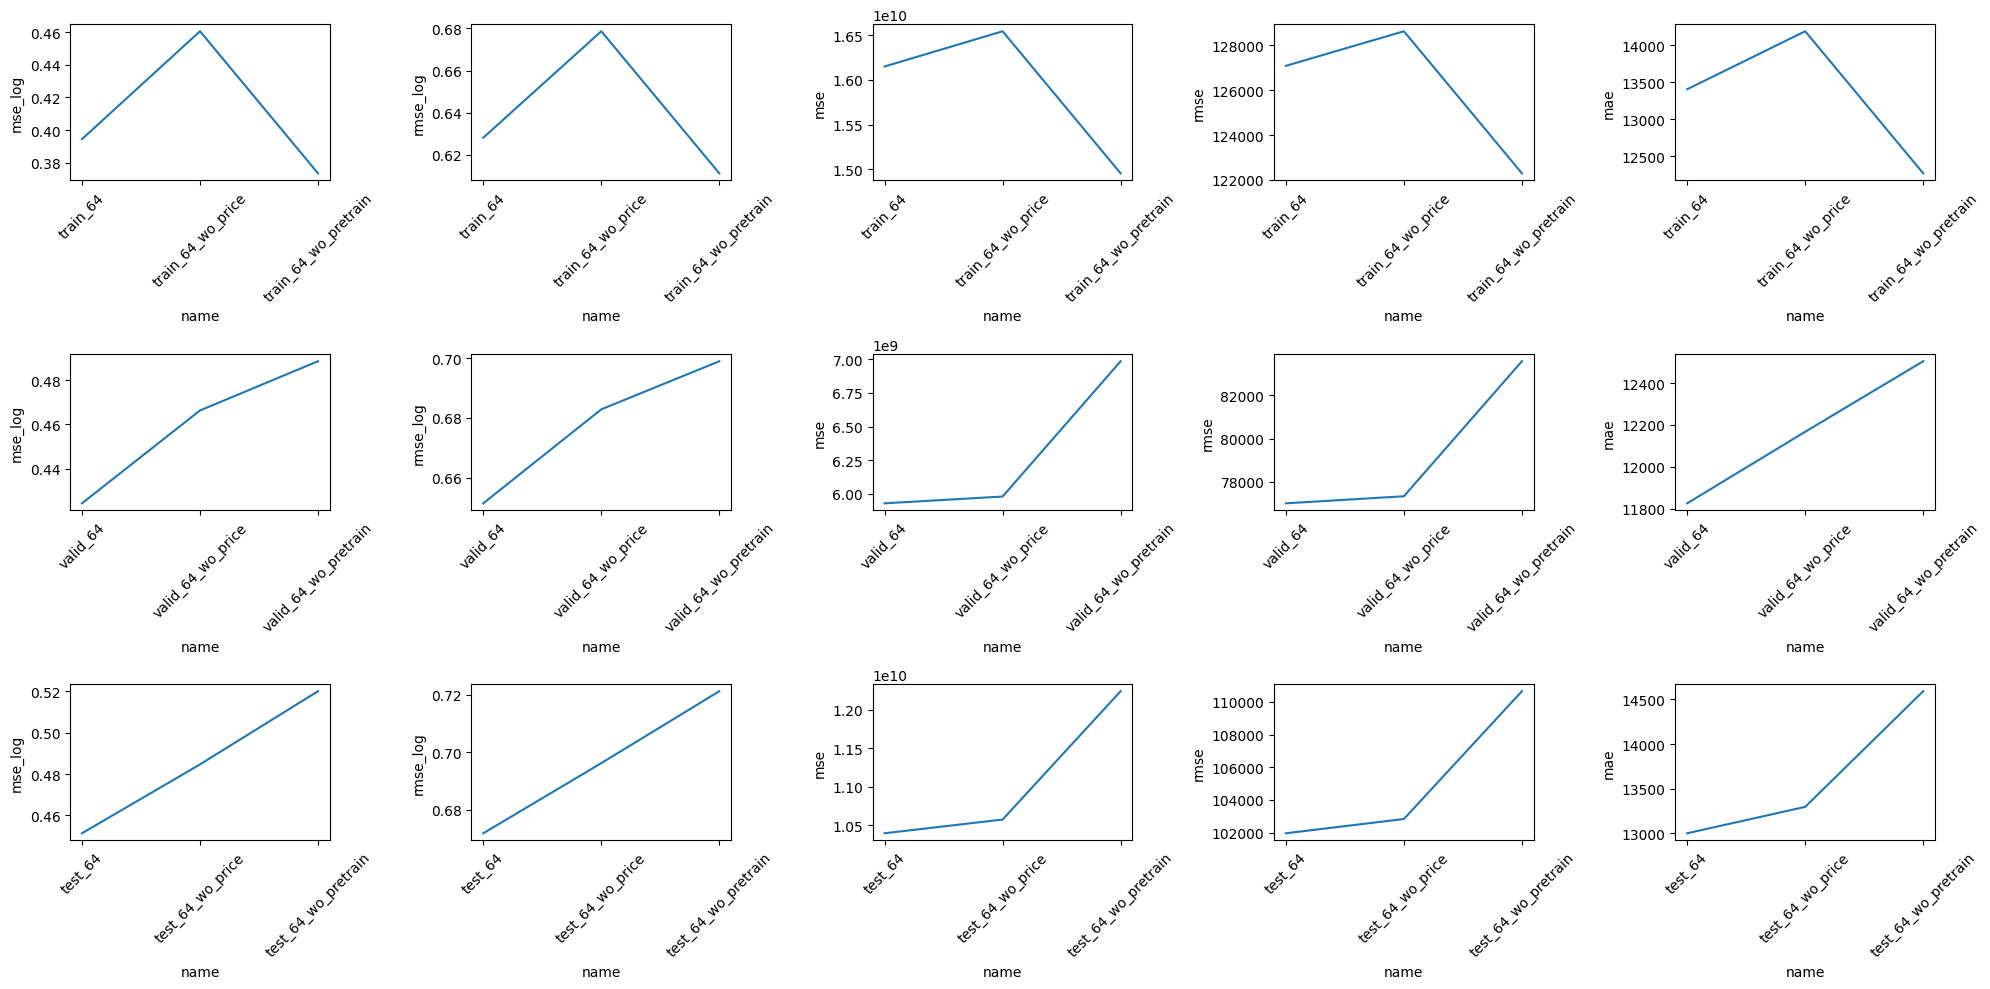

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 5, figsize = (20, 10))
for i in range(3):
  if i == 0:
    df = train_df
  elif i == 1:
    df = valid_df
  else:
    df = test_df
  for j in range(5):
    ax = axs[i][j]
    if j == 0:
      row = "mse_log"
    elif j == 1:
      row = "rmse_log"
    elif j == 2:
      row = "mse"
    elif j == 3:
      row = "rmse"
    elif j == 4:
      row = "mae"
    sns.lineplot(data = df, x = 'name', y = row, ax = ax)
    ax.tick_params(axis = "x", rotation = 45)
fig.tight_layout()

# Q1. Train 데이터 예측 시 `유저 임베딩` 별 양상 확인

- TabNet의 Feature Importance 그래프 : 각 Step의 Mask 정보를 활용해 결과 해석 가능
- 모든 경우에서 `cust(유저 임베딩)`의 Feature Importance는 상대적으로 작은편임
  - 전체 Step에서 `cust(유저 임베딩)` 정보가 가격 예측에 미치는 영향이 제한임

![image](https://user-images.githubusercontent.com/86637320/232431417-feb17d71-17ae-4afb-a9a8-645aad88a2d1.png)
- `가격 정보`를 포함한 `유저 임베딩`을 활용한 경우


----


![image](https://user-images.githubusercontent.com/86637320/232460461-7e7cb25b-0e12-43d9-b957-c8ce653d07e7.png)
- `가격 정보`를 포함하지 않은 `유저 임베딩`을 활용한 경우

---
![image](https://user-images.githubusercontent.com/86637320/232460758-9c467482-4368-4a8a-8060-679076100d22.png)
- 사전 학습된 `유저 임베딩`을 활용하지 않은 경우
---

## 모델 별 예측-Label 양상 확인
  - `사전 학습된 임베딩을 활용하지 않은 모델`은 MSE, RMSE, MSLE, RMSLE, MAE, $R^2$ Metrics 모두에서 앞섰지만 MAPE는 더 높은 값(5.14 % vs 5.22 %)을 기록함
  - 상대적으로 `Overestimation` 하는 경향이 있다고 판단 가능


### 가격 정보가 포함된 사전 학습 임베딩 활용 모델

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

Text(0.5, 1.0, 'Pretrained Embedding with Price')

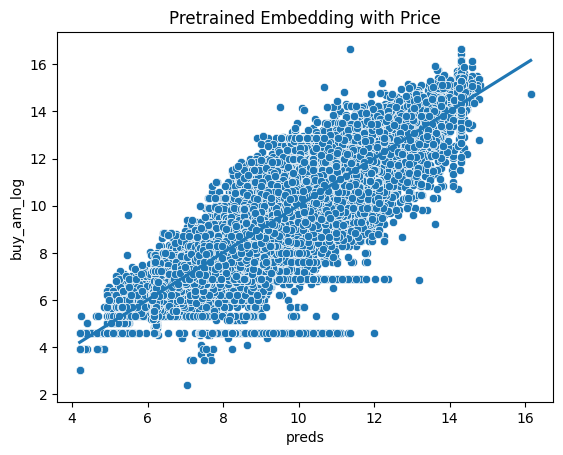

In [ ]:
fig, axs = plt.subplots()
sns.regplot(data = train_64, x = "preds", y = "buy_am_log", scatter = False, ax = axs)
sns.scatterplot(data = train_64, x = "preds", y = "buy_am_log", ax = axs)
axs.set_title("Pretrained Embedding with Price")

In [ ]:
r2 = r2_score(train_64['buy_am_log'], train_64['preds'])
mape = mean_absolute_percentage_error(train_64['buy_am_log'], train_64['preds'])
print(f"R square : {r2}, MAPE : {mape*100:.2f}%")

R square : 0.7870961167028814, MAPE : 5.14%


### 가격 정보가 포함되지 않은 사전 학습 임베딩 활용 모델
- MAE, MSE, RMSE, RMSLE, MSLE, $R^2$, MAPE를 기준으로 모든 면에서 가격 정보 포함된 경우 보다 낮은 성능

Text(0.5, 1.0, 'Pretrained Embedding without Price')

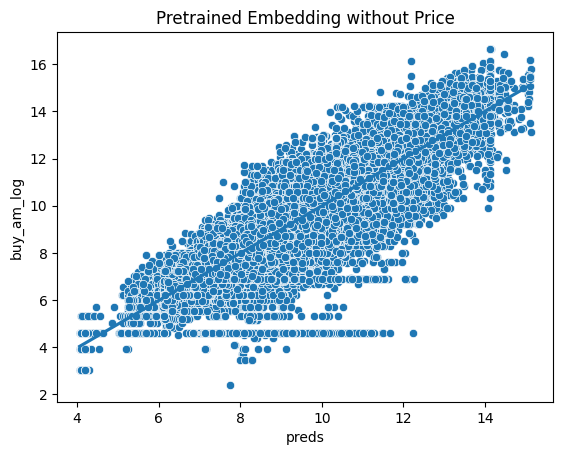

In [ ]:
fig, axs = plt.subplots()
sns.regplot(data = train_64_wo_price, x = "preds", y = "buy_am_log", scatter = False, ax = axs)
sns.scatterplot(data = train_64_wo_price, x = "preds", y = "buy_am_log", ax = axs)
axs.set_title("Pretrained Embedding without Price")

In [ ]:
r2 = r2_score(train_64_wo_price['buy_am_log'], train_64_wo_price['preds'])
mape = mean_absolute_percentage_error(train_64_wo_price['buy_am_log'], train_64_wo_price['preds'])
print(f"R square : {r2}, MAPE : {mape*100:.2f}%")

R square : 0.751369612596714, MAPE : 5.64%


### 사전 학습된 임베딩을 활용하지 않은 모델

Text(0.5, 1.0, 'Without Pretrained Embedding')

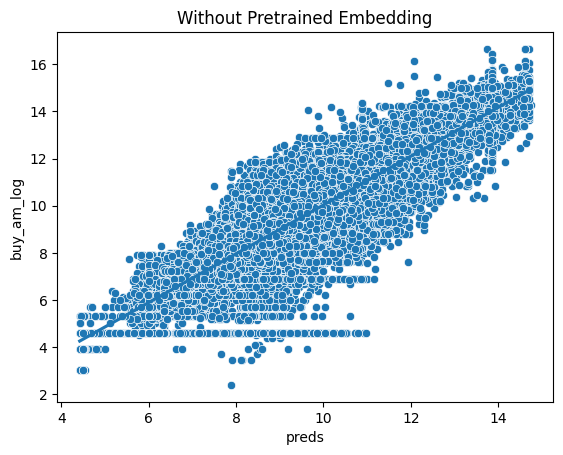

In [ ]:
fig, axs = plt.subplots()
sns.regplot(data = train_64_wo_pretrain, x = "preds", y = "buy_am_log", scatter = False, ax = axs)
sns.scatterplot(data = train_64_wo_pretrain, x = "preds", y = "buy_am_log", ax = axs)
axs.set_title("Without Pretrained Embedding")

In [ ]:
r2 = r2_score(train_64_wo_pretrain['buy_am_log'], train_64_wo_pretrain['preds'])
mape = mean_absolute_percentage_error(train_64_wo_pretrain['buy_am_log'], train_64_wo_pretrain['preds'])
print(f"R square : {r2}, MAPE : {mape*100:.2f}%")

R square : 0.7984379416780938, MAPE : 5.22%


# Q2. Valid/Test 데이터 예측 시 유저 임베딩 사용 효과 
- `사전 학습 임베딩을 활용하지 않은 경우`와 `가격 정보를 포함한 사전 학습 임베딩을 활용한 경우`를 비교

## 모델 별 예측-Label 양상 확인

### Valid 데이터

#### 가격 정보가 포함된 사전 학습 임베딩 활용 모델

Text(0.5, 1.0, 'Pretrained Embedding with Price')

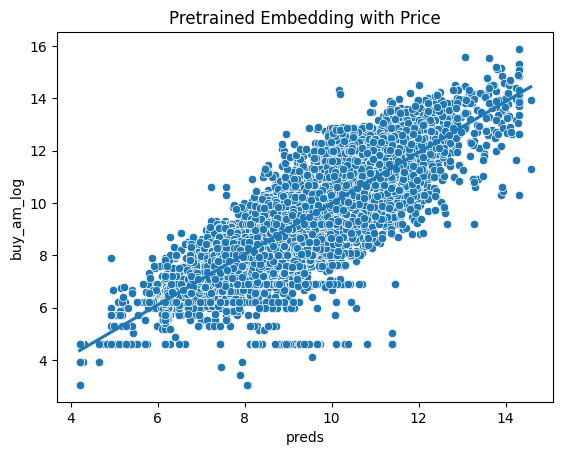

In [ ]:
fig, axs = plt.subplots()
sns.regplot(data = valid_64, x = "preds", y = "buy_am_log", scatter = False, ax = axs)
sns.scatterplot(data = valid_64, x = "preds", y = "buy_am_log", ax = axs)
axs.set_title("Pretrained Embedding with Price")

In [ ]:
mape = mean_absolute_percentage_error(valid_64['buy_am_log'], valid_64['preds'])
print(f"MAPE : {mape*100:.2f}%")

MAPE : 5.39%


#### 사전 학습된 임베딩을 활용하지 않은 모델

Text(0.5, 1.0, 'Without Pretrained Embedding')

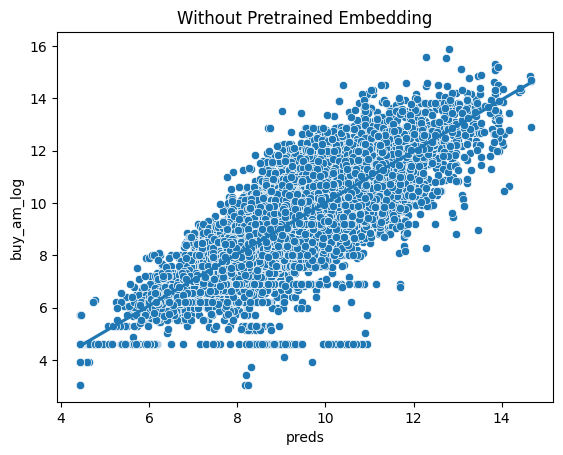

In [ ]:
fig, axs = plt.subplots()
sns.regplot(data = valid_64_wo_pretrain, x = "preds", y = "buy_am_log", scatter = False, ax = axs)
sns.scatterplot(data = valid_64_wo_pretrain, x = "preds", y = "buy_am_log", ax = axs)
axs.set_title("Without Pretrained Embedding")

In [ ]:
mape = mean_absolute_percentage_error(valid_64_wo_pretrain['buy_am_log'], valid_64_wo_pretrain['preds'])
print(f"MAPE : {mape*100:.2f}%")

MAPE : 5.84%


#### 잔차 양상 시각화

In [ ]:
valid_64['preds_diff'] = valid_64['preds'] - valid_64['buy_am_log']
valid_64_wo_pretrain['preds_diff'] = valid_64_wo_pretrain['preds'] - valid_64_wo_pretrain['buy_am_log']

Text(0.5, 0.98, 'Valid Dataset')

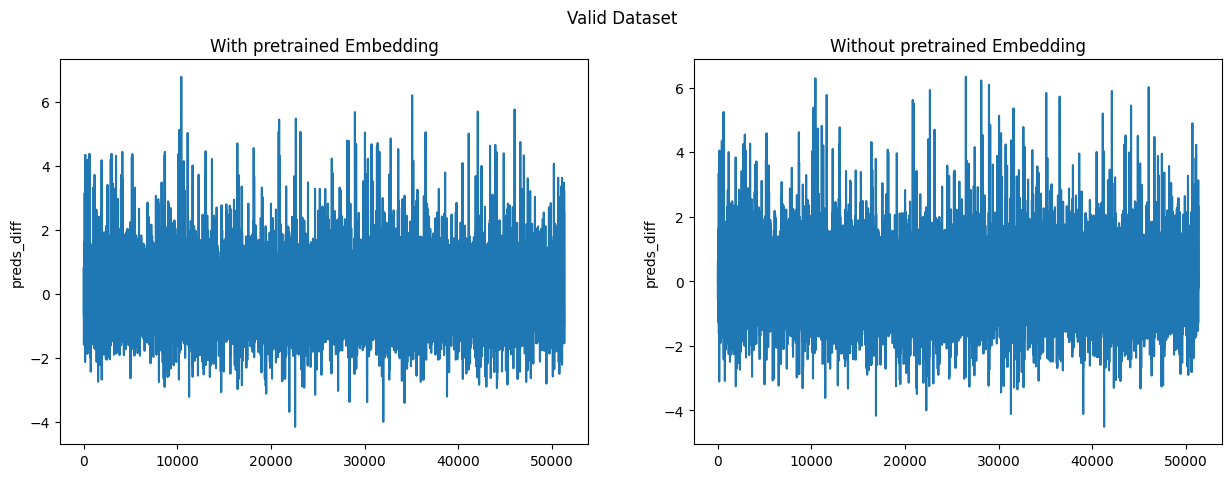

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(data = valid_64['preds_diff'], ax = axs[0])
axs[0].set_title("With pretrained Embedding")

sns.lineplot(data = valid_64_wo_pretrain['preds_diff'], ax = axs[1])
axs[1].set_title("Without pretrained Embedding")
fig.suptitle("Valid Dataset")

In [ ]:
valid_64['preds_diff'] = abs(valid_64['preds'] - valid_64['buy_am_log'])
valid_64_wo_pretrain['preds_diff'] = abs(valid_64_wo_pretrain['preds'] - valid_64_wo_pretrain['buy_am_log'])

<ipython-input-255-7e1b84e39d93>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_64['preds_diff'], label = "With pretrained Embedding", ax = axs)
<ipython-input-255-7e1b84e39d93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_64_wo_pretrain['preds_diff'], label = "Without pretrain

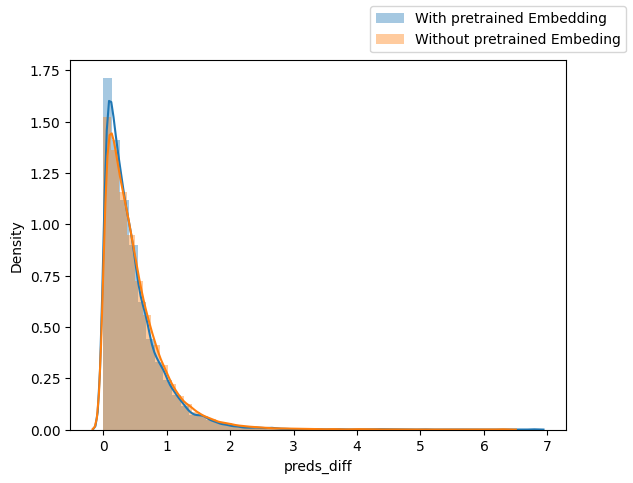

In [ ]:
fig, axs = plt.subplots()

sns.distplot(valid_64['preds_diff'], label = "With pretrained Embedding", ax = axs)
sns.distplot(valid_64_wo_pretrain['preds_diff'], label = "Without pretrained Embeding", ax = axs)
fig.legend()

### Test 데이터

#### 가격 정보가 포함된 사전 학습 임베딩 활용 모델

Text(0.5, 1.0, 'Pretrained Embedding with Price')

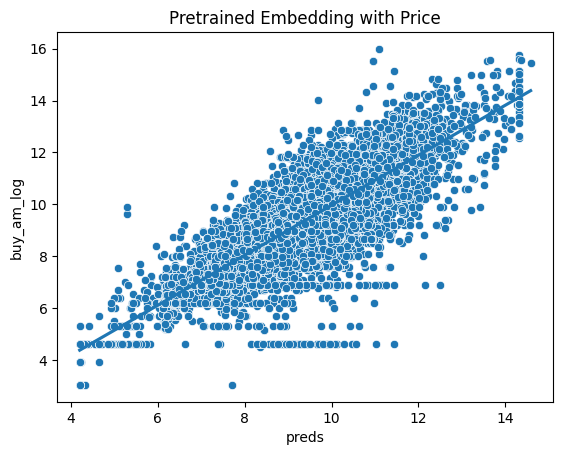

In [ ]:
fig, axs = plt.subplots()
sns.regplot(data = test_64, x = "preds", y = "buy_am_log", scatter = False, ax = axs)
sns.scatterplot(data = test_64, x = "preds", y = "buy_am_log", ax = axs)
axs.set_title("Pretrained Embedding with Price")

In [ ]:
mape = mean_absolute_percentage_error(test_64['buy_am_log'], test_64['preds'])
print(f"MAPE : {mape*100:.2f}%")

MAPE : 5.46%


#### 사전 학습된 임베딩을 활용하지 않은 모델

Text(0.5, 1.0, 'Without Pretrained Embedding')

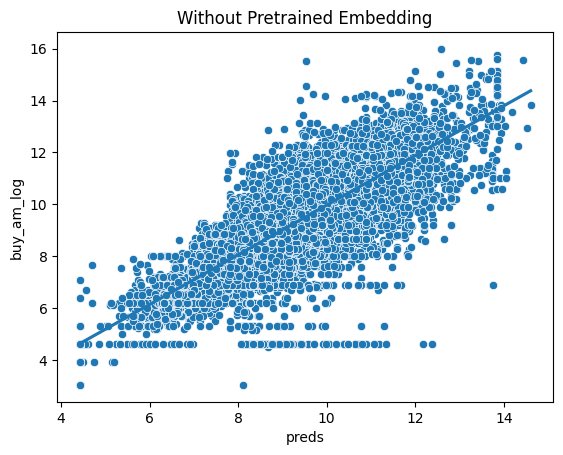

In [ ]:
fig, axs = plt.subplots()
sns.regplot(data = test_64_wo_pretrain, x = "preds", y = "buy_am_log", scatter = False, ax = axs)
sns.scatterplot(data = test_64_wo_pretrain, x = "preds", y = "buy_am_log", ax = axs)
axs.set_title("Without Pretrained Embedding")

In [ ]:
mape = mean_absolute_percentage_error(test_64_wo_pretrain['buy_am_log'], test_64_wo_pretrain['preds'])
print(f"MAPE : {mape*100:.2f}%")

MAPE : 5.94%


#### 잔차 양상 시각화

In [ ]:
test_64['preds_diff'] = test_64['preds'] - test_64['buy_am_log']
test_64_wo_pretrain['preds_diff'] = test_64_wo_pretrain['preds'] - test_64_wo_pretrain['buy_am_log']

Text(0.5, 0.98, 'Test Dataset')

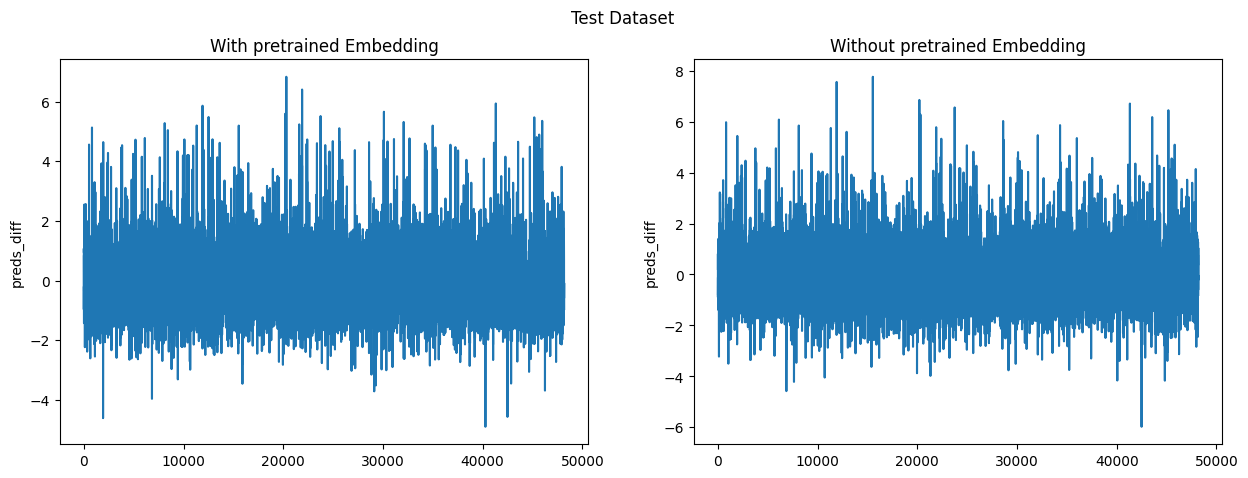

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(data = test_64['preds_diff'], ax = axs[0])
axs[0].set_title("With pretrained Embedding")

sns.lineplot(data = test_64_wo_pretrain['preds_diff'], ax = axs[1])
axs[1].set_title("Without pretrained Embedding")
fig.suptitle("Test Dataset")

In [ ]:
test_64['preds_diff'] = abs(test_64['preds'] - test_64['buy_am_log'])
test_64_wo_pretrain['preds_diff'] = abs(test_64_wo_pretrain['preds'] - test_64_wo_pretrain['buy_am_log'])

<ipython-input-257-05d7b7e4679d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_64['preds_diff'], label = "With pretrained Embedding", ax = axs)
<ipython-input-257-05d7b7e4679d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_64_wo_pretrain['preds_diff'], label = "Without pretrained

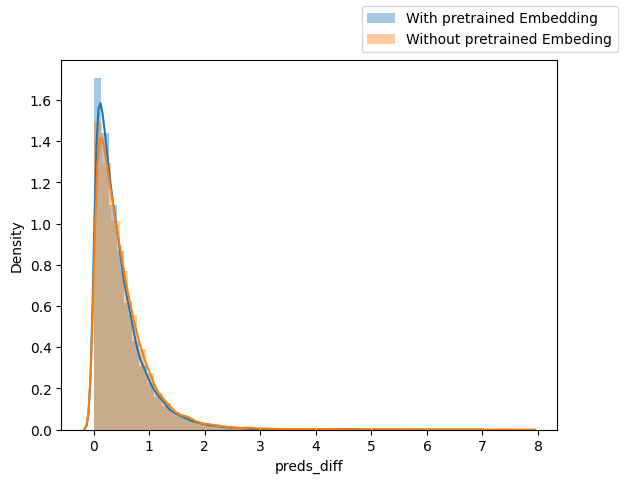

In [ ]:
fig, axs = plt.subplots()

sns.distplot(test_64['preds_diff'], label = "With pretrained Embedding", ax = axs)
sns.distplot(test_64_wo_pretrain['preds_diff'], label = "Without pretrained Embeding", ax = axs)
fig.legend()

## 개선된 예측 확인

In [ ]:
valid_64['preds_improve'] = abs(valid_64['preds_diff'] - valid_64_wo_pretrain['preds_diff'])
test_64['preds_improve'] = abs(test_64['preds_diff'] - test_64_wo_pretrain['preds_diff'])

Text(0.5, 1.0, 'Test Dataset')

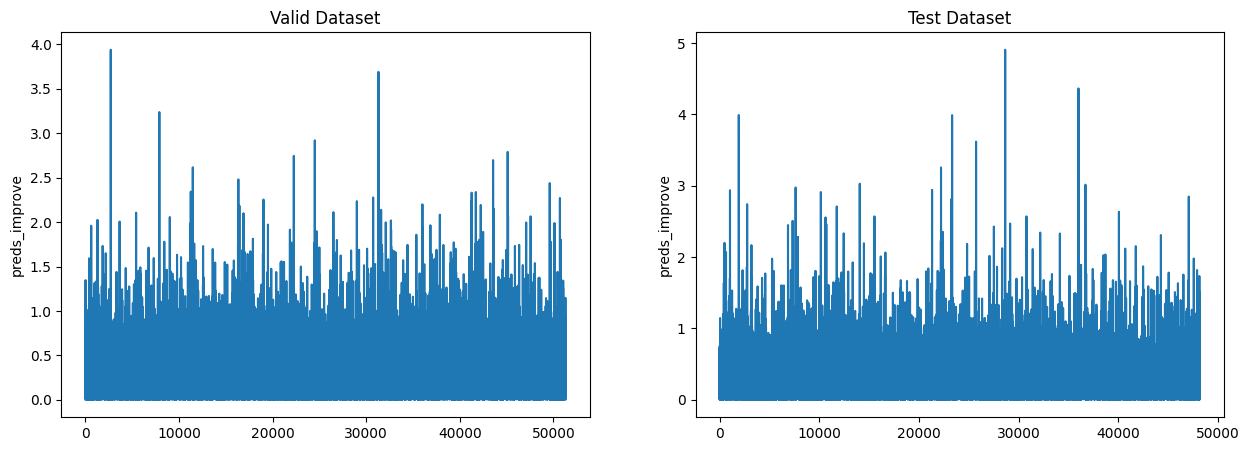

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.lineplot(data = valid_64['preds_improve'], ax = axs[0])
axs[0].set_title("Valid Dataset")

sns.lineplot(data = test_64['preds_improve'], ax = axs[1])
axs[1].set_title("Test Dataset")

Text(0.5, 1.0, 'Test Dataset')

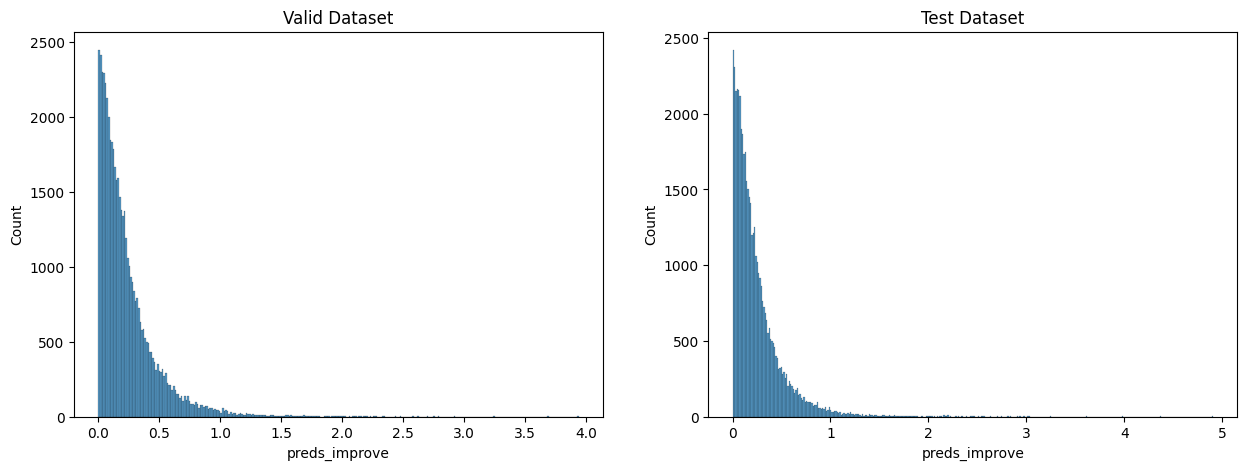

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(valid_64['preds_improve'], ax = axs[0])
axs[0].set_title("Valid Dataset")

sns.histplot(test_64['preds_improve'], ax = axs[1])
axs[1].set_title("Test Dataset")

# Q3. Cold-start 예측에도 도움이 되는지 확인
- `Train` 데이터에 포함되지 않은 Cold-start 유저 예측 시 `사전 학습 임베딩`이 효과적인지 확인
- 시각화 결과 기존 유저에 대한 예측보다 Cold Start 유저에 대한 예측에서 개선이 더 많이 됨을 확인

### Valid 데이터

In [ ]:
len(set(valid_64.cust) - set(train_64.cust))

782

In [ ]:
valid_64_cold = valid_64.loc[valid_64.cust.isin(set(valid_64.cust) - set(train_64.cust))]
valid_64_not_cold = valid_64.loc[~valid_64.cust.isin(set(valid_64.cust) - set(train_64.cust))]

<ipython-input-265-d00a57da3a06>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_64_cold['preds_improve'], label = "Cold Start User")
<ipython-input-265-d00a57da3a06>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_64_not_cold['preds_improve'], label = "Regular User")


Text(0.5, 0.98, 'Valid Dataset')

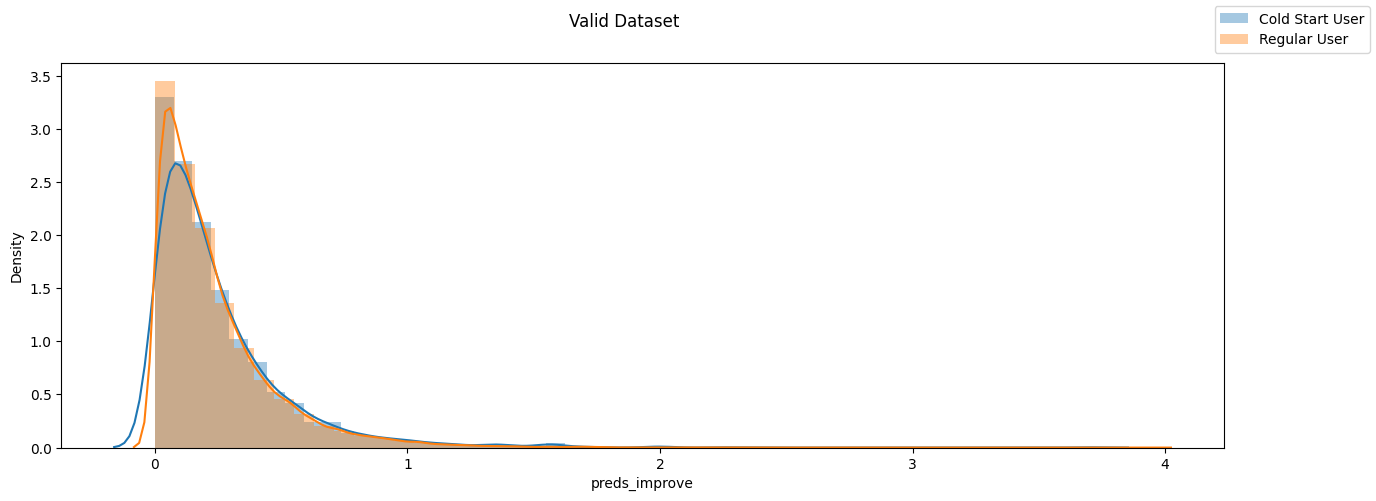

In [ ]:
fig, axs = plt.subplots(figsize = (15, 5))

sns.distplot(valid_64_cold['preds_improve'], label = "Cold Start User")
sns.distplot(valid_64_not_cold['preds_improve'], label = "Regular User")
fig.legend()
fig.suptitle("Valid Dataset")

## Test 데이터

In [ ]:
len(set(test_64.cust) - set(train_64.cust))

784

In [ ]:
test_64_cold = test_64.loc[valid_64.cust.isin(set(valid_64.cust) - set(train_64.cust))]
test_64_not_cold = test_64.loc[~valid_64.cust.isin(set(valid_64.cust) - set(train_64.cust))]

<ipython-input-268-9928bc2b10cd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_64_cold['preds_improve'], label = "Cold Start User")
<ipython-input-268-9928bc2b10cd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_64_not_cold['preds_improve'], label = "Regular User")


Text(0.5, 0.98, 'Test Dataset')

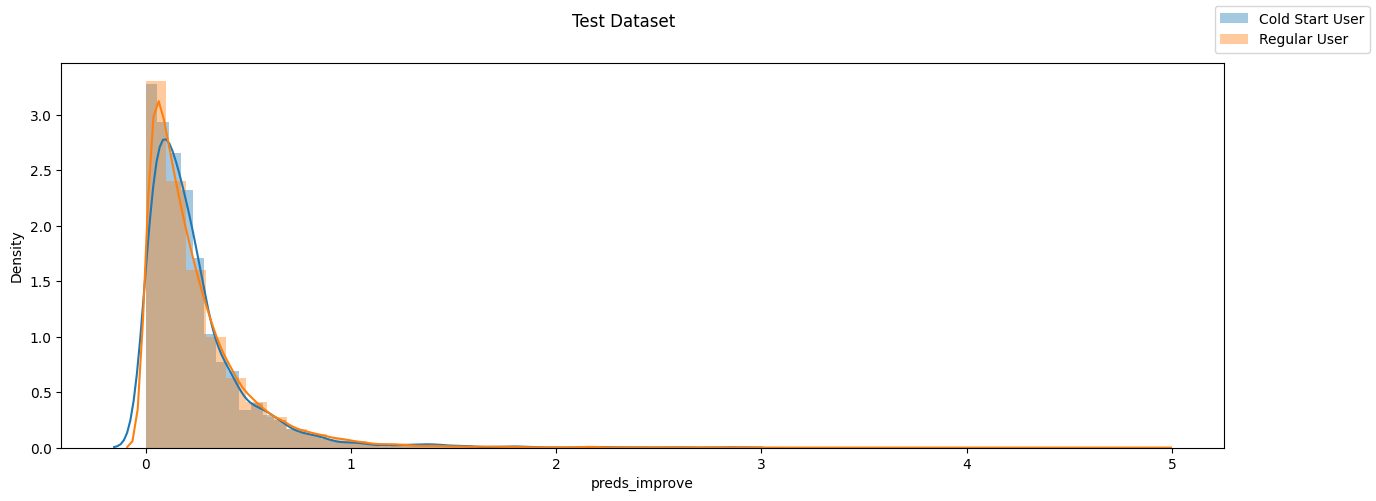

In [ ]:
fig, axs = plt.subplots(figsize = (15, 5))

sns.distplot(test_64_cold['preds_improve'], label = "Cold Start User")
sns.distplot(test_64_not_cold['preds_improve'], label = "Regular User")
fig.legend()
fig.suptitle("Test Dataset")